# Pandas - Data Analysis with Python


### Installation

* If you have Anaconda: Already installed
* If you have Miniconda: `conda install pandas`
* If you have your another Python distribution: `pip install pandas --user`

### More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Wes MecKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html

## Quick guide through Pandas


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

/home/sf1409/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Loading in data

Pandas offers various drivers to load data in different formats:

In [3]:
pd.read_csv?

In [4]:
pd.read_excel?

In [4]:
pd.read_*?

## Saving data 

Saving Pandas tables is easy:

In [8]:
pd.DataFrame.to_*?

## Some interesting data sources

* Your own research data!
* Statistisk sentralbyrå https://www.ssb.no
* Finn API https://www.finn.no
* Ruter API https://ruter.no/labs/
* YR data http://om.yr.no/verdata/free-weather-data/
* Oslo Bysykkel API https://developer.oslobysykkel.no/data
* Financial and economic data https://www.quandl.com/

## Python challenge

1. Download the Oslo Bysykkel trips data from October 2016 [here](https://github.com/UiO-INF3331/UiO-INF3331.github.io/blob/crash-course/lectures/pandas/data/bysykkel/trips-2016.10.1-2016.10.31.csv?raw=true). Open the file in an editor and understand the meaning of each column.  
2. Load the data into pandas and inspect the result.












.





### Reading in the Oslo Byskkel data 

The header of the data explains the meaning of each column:

In [6]:
!head -n 5 data/bysykkel/trips-2016.10.1-2016.10.31.csv

Start station,Start time,End station,End time
283,2016-10-01 06:00:08 +0200,238,2016-10-01 06:09:47 +0200
169,2016-10-01 06:00:41 +0200,175,2016-10-01 06:11:07 +0200
211,2016-10-01 06:01:02 +0200,162,2016-10-01 06:15:52 +0200
200,2016-10-01 06:01:20 +0200,163,2016-10-01 06:15:04 +0200


In [7]:
bike_stats = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', sep=',')
type(bike_stats)

pandas.core.frame.DataFrame

We can limit the output to the first 5 entries with head():

In [8]:
bike_stats.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


### Selecting columns and rows

We can select a column with the index notation. As index we use the column title(s):

In [9]:
bike_stats[['Start time', 'End time']].head()

,Start time,End time
0,2016-10-01 06:00:08 +0200,2016-10-01 06:09:47 +0200
1,2016-10-01 06:00:41 +0200,2016-10-01 06:11:07 +0200
2,2016-10-01 06:01:02 +0200,2016-10-01 06:15:52 +0200
3,2016-10-01 06:01:20 +0200,2016-10-01 06:15:04 +0200
4,2016-10-01 06:02:16 +0200,2016-10-01 06:04:29 +0200


A range of rows can be selected by indexing a slice:

In [10]:
bike_stats[5:10]

,Start station,Start time,End station,End time
5,177,2016-10-01 06:04:22 +0200,179.0,2016-10-01 06:24:40 +0200
6,257,2016-10-01 06:04:39 +0200,199.0,2016-10-01 06:16:09 +0200
7,191,2016-10-01 06:05:54 +0200,191.0,2016-10-01 06:06:21 +0200
8,191,2016-10-01 06:06:01 +0200,167.0,2016-10-01 06:15:40 +0200
9,181,2016-10-01 06:06:13 +0200,251.0,2016-10-01 06:18:34 +0200


... or combining them to the certain rows and columns:

In [11]:
bike_stats[['Start time', 'End time']][5:10]

,Start time,End time
5,2016-10-01 06:04:22 +0200,2016-10-01 06:24:40 +0200
6,2016-10-01 06:04:39 +0200,2016-10-01 06:16:09 +0200
7,2016-10-01 06:05:54 +0200,2016-10-01 06:06:21 +0200
8,2016-10-01 06:06:01 +0200,2016-10-01 06:15:40 +0200
9,2016-10-01 06:06:13 +0200,2016-10-01 06:18:34 +0200


### Column types
Pandas tries to automatically detect the type of a column:

In [12]:
bike_stats.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

For our data, the automatic detection failed for *Start time* and *End time*: both of these should be datetime types.

## Python challenge

1. Fix the dtypes for the "Start time" and "End time" columns. Hint: read the documentation of `read_csv`.
2. **Bonus**: The *End station* coulmn has datatype float rather than int. Why?

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [13]:
bike_stats = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', sep=',', parse_dates=['Start time', 'End time'])

In [14]:
bike_stats.dtypes

Start station             int64
Start time       datetime64[ns]
End station             float64
End time         datetime64[ns]
dtype: object

Note: The `End station` column has been detected as `float` rather than `int`. This is because the `End station` column contains Not a Number values (`NaN`) which can be represented in the `float` datatype, but not in the `int` datatype

### Plotting

We can use the `plot` function to plot our table:

We can also select a column to be used as the x-axis labels:

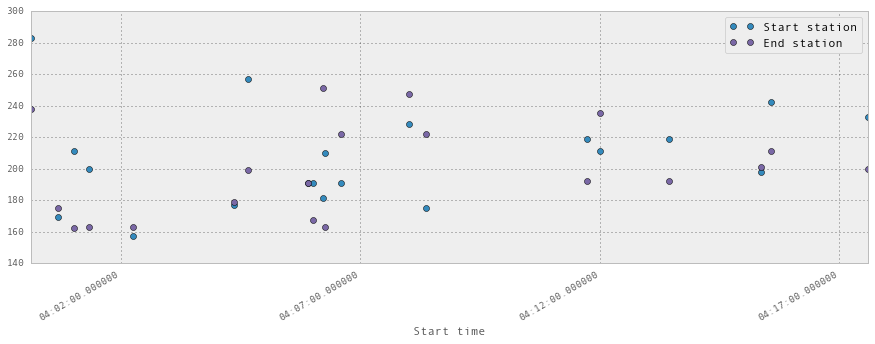

In [15]:
bike_stats[['Start time', 'Start station', 'End station']][:20].plot(x='Start time', style="o")

Plot has many other options that are worth exploring:

In [16]:
bike_stats.plot?

## Python challenge

1. Find the 20 busiest bike stations (i.e. where most cycle trips started). **Hint**: use the function `DataFrame.value_counts`.
2. Plot the result with the station-id on the x-axis and the number of trips on the y-axis.

## What are the top bike stations?

In [17]:
bike_stats['Start station'].value_counts()[:20]

233    7832
267    6713
222    5221
294    4513
181    4440
277    4345
191    4325
253    4278
195    3986
196    3911
229    3771
210    3586
262    3568
164    3428
287    3289
228    3098
232    3075
292    2908
190    2888
226    2790
Name: Start station, dtype: int64

We can also plot these in the bar chart:

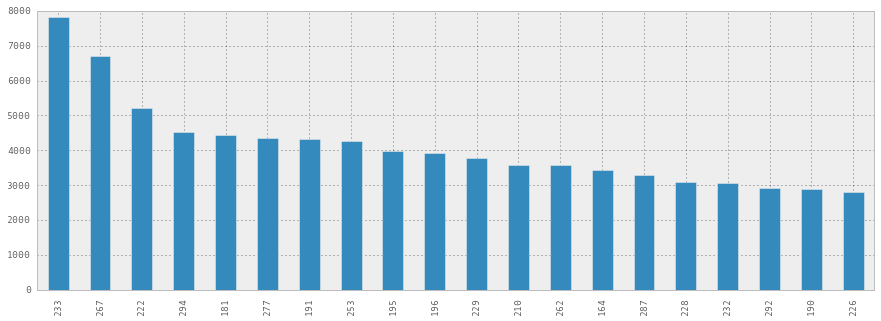

In [18]:
bike_stats['Start station'].value_counts()[:20].plot(kind='bar')

# Linking multiple tables

Instead of working with station-ids, it would be nice to have the GPS coordinates and name of each station.
The information about each station is contained in the file `stations.json`:

In [20]:
!ls data/bysykkel/stations.json

data/bysykkel/stations.json


The obvious thing would be to use `pd.read_json`, but this does not work because it expects the json to be in a Pandas specific format.

In [21]:
# bike_stations = pd.read_json('data/bysykkel/stations')  # does not work

Instead we load the data with the `json` module:

In [57]:
import json
json_stations = json.load(open('data/bysykkel/stations.json', 'r'))
json_stations = json_stations['stations']

We can now use the `pandas.io.json_normalize` function to read in the entire dataset:

In [58]:
stations = pd.io.json.json_normalize(station_json)
stations.head()

,bounds,center.latitude,center.longitude,id,in_service,number_of_locks,subtitle,title
0,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248,157,True,30,mellom Norbygata og Urtegata,Nylandsveien
1,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170,158,True,24,rett over busstoppet,Bentsebrugata
2,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279,159,True,21,Mellom Åsengata og Nordkappgata,Hans Nielsen Hauges plass
3,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687,160,True,25,nærmest fontenen,Sjøsiden vest
4,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456,161,True,20,ved busstoppet Colletts gate,St. Hanshaugen park vest


## Python challenge

1. Download the [stations.json](https://github.com/UiO-INF3331/UiO-INF3331.github.io/blob/crash-course/lectures/pandas/data/bysykkel/stations.json) file and load it into Pandas.
2. It is good practice to assign a column with unique values as the index of the dataframe. Identify a suitable index for the stations dataset and set it using the `DataFrame.set_index` function.
3. Sort the DataFrame by the number of locks (hint: `DataFrame.sort`) and create a plot with the "number of locks" on the y-axis and the "station tile" on the x-axis.

## Setting an index

And before extracting data from the dataframe, it is good practice to assign a column with unique values as the index of the dataframe. For the stations DataFrame, the `id` column is a good choice:

In [25]:
stations = stations.set_index('id')
stations.head()

,bounds,center.latitude,center.longitude,in_service,number_of_locks,subtitle,title
id,,,,,,,
157,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248,True,30,mellom Norbygata og Urtegata,Nylandsveien
158,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170,True,24,rett over busstoppet,Bentsebrugata
159,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279,True,21,Mellom Åsengata og Nordkappgata,Hans Nielsen Hauges plass
160,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687,True,25,nærmest fontenen,Sjøsiden vest
161,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456,True,20,ved busstoppet Colletts gate,St. Hanshaugen park vest


The index will be used, e.g. for row labels when plotting:

/home/sf1409/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


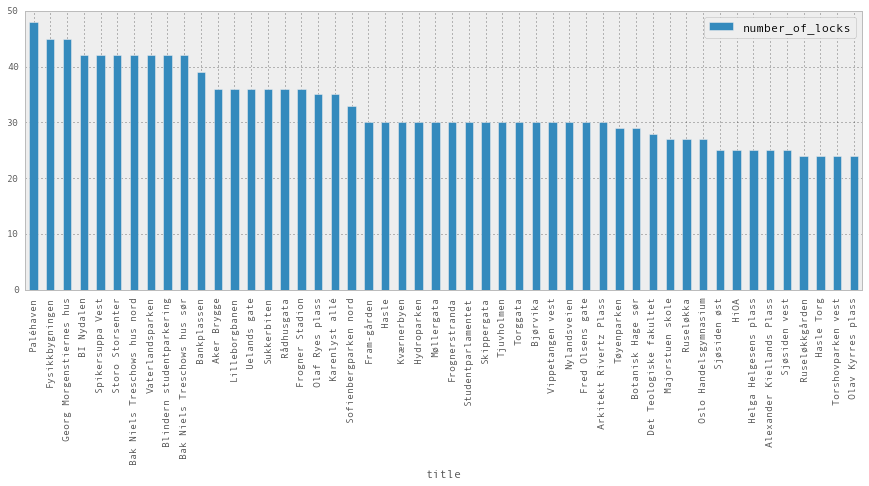

In [59]:
stations = stations.sort(columns="number_of_locks", ascending=False)
stations[["number_of_locks", "title"]][0:50].plot(kind="bar", x="title")

Some of the columns are not so usefull. We can remove some columns with the *drop* function:

In [60]:
stations = stations.drop(["bounds", "subtitle"], axis=1)
stations.head()

,center.latitude,center.longitude,id,in_service,number_of_locks,title
40,59.910287,10.750012,204,True,48,Paléhaven
124,59.937955,10.719527,304,True,45,Fysikkbygningen
125,59.938998,10.723075,305,True,45,Georg Morgenstiernes hus
63,59.949246,10.768577,231,True,42,BI Nydalen
66,59.913731,10.736032,234,True,42,Spikersuppa Vest


Mathematical functions such as `min`, `max` or `mean` work as expected:

In [62]:
print("min number of locks:  {}".format(stations["number_of_locks"].min()))
print("max number of locks:  {}".format(stations["number_of_locks"].max()))
print("mean number of locks: {}".format(stations["number_of_locks"].mean()))

min number of locks:  6
max number of locks:  48
mean number of locks: 22.29230769230769


We can `where` statments to find rows that satisfy certain conditions: 

In [63]:
large_stations = stations[stations["number_of_locks"] > 30]

In [64]:
len(large_stations), len(stations)

(20, 130)

## Plotting maps

It would be nice to plot the stations in a Google Maps map. We use the module `gmplot` for this:

In [33]:
import gmplot

gmap = gmplot.GoogleMapPlotter(59.915620, 10.762248, zoom=12)
gmap.draw("mymap.html")

We can now open up the `mymap.html` with our favorite browser (or in the IPython notebook):

In [65]:
# Show the plot
from IPython.display import IFrame
IFrame('mymap.html', width=700, height=350)

Next, we extract the stations longtitude, latitude and location tile: 

In [35]:
stations[["center.latitude", "center.longitude"]].head()

,center.latitude,center.longitude
id,,
204,59.910287,10.750012
304,59.937955,10.719527
305,59.938998,10.723075
231,59.949246,10.768577
234,59.913731,10.736032


In [36]:
x = stations["center.latitude"][:10]

In [37]:
x.values

array([ 59.910287,  59.937955,  59.938998,  59.949246,  59.913731,
        59.946699,  59.942725,  59.913409,  59.94093 ,  59.942525])

And add it to our plot:

In [38]:
from insertapikey import insertapikey
gmap.scatter(stations["center.latitude"].values, stations["center.longitude"].values, size=10, marker=True)
gmap.draw("mymap_with_stations.html")
insertapikey("mymap_with_stations.html")

In [39]:
!google-chrome mymap_with_stations.html  

Created new window in existing browser session.


## Merging Panda objects

So far our bike statistics stores the bike stations as abstract integers:


In [66]:
bike_stats["Start station"].head()

0    283
1    169
2    211
3    200
4    157
Name: Start station, dtype: int64

Wouldn't it be nice to add more information about the station? We can do this by merging the information in the `stations` DataFrame into the `bike_stats_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method

## Python challenge

1. Try to merge the station and the bike_stats DataFrames. The new table should consist of the bike_stats table, with additional columns with the information about the **Start station**.
2. **Bonus**: Merge also the station information of the **End station**.

Let's try it out. First, lets check the names of our columns again:

In [41]:
print(bike_stats.dtypes)

Start station             int64
Start time       datetime64[ns]
End station             float64
End time         datetime64[ns]
dtype: object


In [42]:
print(stations.dtypes)

center.latitude     float64
center.longitude    float64
in_service             bool
number_of_locks       int64
title                object
dtype: object


We want to merge in the columns `bike_stats["Start station"]` with the index for `stations`. We merge call is therefore:

In [43]:
merged_bike_stats = pd.merge(bike_stats, stations, how='left', left_on="Start station", right_index=True)
merged_bike_stats

,Start station,Start time,End station,End time,center.latitude,center.longitude,in_service,number_of_locks,title
0,283,2016-10-01 04:00:08,238.0,2016-10-01 04:09:47,59.932449,10.721813,True,12.0,Marienlyst
1,169,2016-10-01 04:00:41,175.0,2016-10-01 04:11:07,59.924729,10.724579,True,18.0,Bogstadveien
2,211,2016-10-01 04:01:02,162.0,2016-10-01 04:15:52,59.912779,10.751116,True,12.0,Oslo City
3,200,2016-10-01 04:01:20,163.0,2016-10-01 04:15:04,59.914990,10.773942,True,15.0,Tøyen skole
4,157,2016-10-01 04:02:16,163.0,2016-10-01 04:04:29,59.915620,10.762248,True,30.0,Nylandsveien
5,177,2016-10-01 04:04:22,179.0,2016-10-01 04:24:40,59.915650,10.777671,True,29.0,Tøyenparken
6,257,2016-10-01 04:04:39,199.0,2016-10-01 04:16:09,59.923033,10.771682,True,10.0,Trondheimsveien
7,191,2016-10-01 04:05:54,191.0,2016-10-01 04:06:21,59.917879,10.754906,True,9.0,Jakob kirke
8,191,2016-10-01 04:06:01,167.0,2016-10-01 04:15:40,59.917879,10.754906,True,9.0,Jakob kirke
9,181,2016-10-01 04:06:13,251.0,2016-10-01 04:18:34,59.913015,10.746714,True,24.0,Kirkeristen


Let's check that we still have all the data rows:

In [44]:
print(len(merged_bike_stats))
print(len(bike_stats))

242758
242758


Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffices`:

In [45]:
merged_bike_stats2 = pd.merge(merged_bike_stats, stations, how='left', left_on="End station", right_index=True, suffixes=("_start", "_end"))
merged_bike_stats2

,Start station,Start time,End station,End time,center.latitude_start,center.longitude_start,in_service_start,number_of_locks_start,title_start,center.latitude_end,center.longitude_end,in_service_end,number_of_locks_end,title_end
0,283,2016-10-01 04:00:08,238.0,2016-10-01 04:09:47,59.932449,10.721813,True,12.0,Marienlyst,59.915640,10.740921,True,10.0,Tinghuset
1,169,2016-10-01 04:00:41,175.0,2016-10-01 04:11:07,59.924729,10.724579,True,18.0,Bogstadveien,59.912504,10.762236,True,15.0,Grønlands torg
2,211,2016-10-01 04:01:02,162.0,2016-10-01 04:15:52,59.912779,10.751116,True,12.0,Oslo City,59.934934,10.749475,True,30.0,Arkitekt Rivertz Plass
3,200,2016-10-01 04:01:20,163.0,2016-10-01 04:15:04,59.914990,10.773942,True,15.0,Tøyen skole,59.913409,10.757370,True,42.0,Vaterlandsparken
4,157,2016-10-01 04:02:16,163.0,2016-10-01 04:04:29,59.915620,10.762248,True,30.0,Nylandsveien,59.913409,10.757370,True,42.0,Vaterlandsparken
5,177,2016-10-01 04:04:22,179.0,2016-10-01 04:24:40,59.915650,10.777671,True,29.0,Tøyenparken,59.925065,10.775981,True,12.0,Carl Berners plass\n sør
6,257,2016-10-01 04:04:39,199.0,2016-10-01 04:16:09,59.923033,10.771682,True,10.0,Trondheimsveien,59.914654,10.735447,True,15.0,Studenterlunden
7,191,2016-10-01 04:05:54,191.0,2016-10-01 04:06:21,59.917879,10.754906,True,9.0,Jakob kirke,59.917879,10.754906,True,9.0,Jakob kirke
8,191,2016-10-01 04:06:01,167.0,2016-10-01 04:15:40,59.917879,10.754906,True,9.0,Jakob kirke,59.920565,10.734274,True,18.0,Pilestredet Park Studenthus
9,181,2016-10-01 04:06:13,251.0,2016-10-01 04:18:34,59.913015,10.746714,True,24.0,Kirkeristen,59.931524,10.762185,True,10.0,Hallénparken


## Concatenating DataFrames

The data so far only contained the statistics for October 2016:

In [46]:
bike_stats["Start time"].min(), bike_stats["Start time"].max()

(Timestamp('2016-10-01 04:00:08'), Timestamp('2016-10-31 22:59:10'))

Let us load the data for September 2016:

In [47]:
bike_stats_september = pd.read_csv('data/bysykkel/trips-2016.9.1-2016.9.30.csv', sep=',', parse_dates=['Start time', 'End time'])

To concatenate the two, we use the `concat` function:

In [48]:
bike_stats_sep_oct = pd.concat((bike_stats_september, bike_stats))

**Note**: An altnerative implementation is 
```
bike_stats_sep_oct = bike_stats_september.append(bike_stats)
```

Let's check again that we indeed have the full range:

In [49]:
bike_stats_sep_oct["Start time"].min(), bike_stats_sep_oct["Start time"].max()

(Timestamp('2016-09-01 04:00:02'), Timestamp('2016-10-31 22:59:10'))

## What are the busiest stations?

Let's first find the busiest station:

In [50]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station

233    7832
267    6713
222    5221
294    4513
181    4440
Name: Start station, dtype: int64

In [51]:
stations.loc[busy_station.index]

,center.latitude,center.longitude,in_service,number_of_locks,title
233,59.928050,10.751203,True,25,Alexander Kiellands Plass
267,59.925480,10.731318,True,24,Bislett Stadion
222,59.922414,10.758127,True,35,Olaf Ryes plass
294,59.915936,10.751573,True,30,Torggata
181,59.913015,10.746714,True,24,Kirkeristen


Next lets filter out all statistics of this station

In [52]:
ak_plass_stats = merged_bike_stats[merged_bike_stats["Start station"] == busy_station.index[0]]
ak_plass_stats

,Start station,Start time,End station,End time,center.latitude,center.longitude,in_service,number_of_locks,title
19,233,2016-10-01 04:17:36,200.0,2016-10-01 04:31:11,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
70,233,2016-10-01 04:56:24,196.0,2016-10-01 04:58:14,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
99,233,2016-10-01 05:13:05,298.0,2016-10-01 05:30:54,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
111,233,2016-10-01 05:16:18,297.0,2016-10-01 05:26:09,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
183,233,2016-10-01 05:44:59,192.0,2016-10-01 05:52:18,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
278,233,2016-10-01 06:27:38,301.0,2016-10-01 06:35:22,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
298,233,2016-10-01 06:38:10,200.0,2016-10-01 06:46:52,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
355,233,2016-10-01 06:54:51,172.0,2016-10-01 06:58:10,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
376,233,2016-10-01 07:00:10,186.0,2016-10-01 07:05:19,59.92805,10.751203,True,25.0,Alexander Kiellands Plass
382,233,2016-10-01 07:01:50,214.0,2016-10-01 07:10:15,59.92805,10.751203,True,25.0,Alexander Kiellands Plass


Let's plot the results

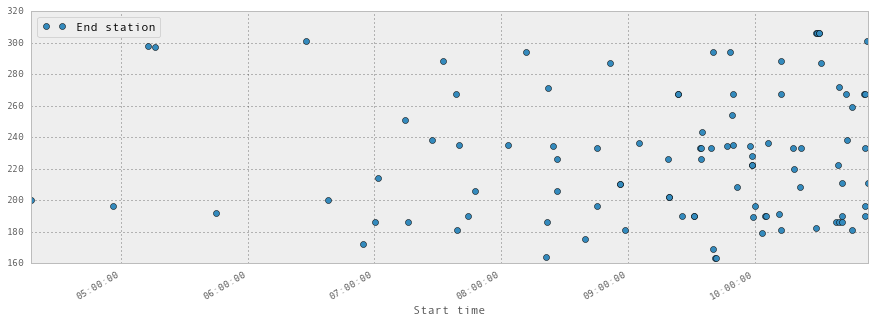

In [53]:
ak_plass_stats[:100].plot(x="Start time", y=["End station"], kind="line", style="o")